In [148]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sphere_sim_methods import real_space_profile
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

def plot_signal(df : pd.DataFrame, x_name : str, y_name : str, x_label : str, y_label : str,
                title : str, x_low_limit : int, x_upper_limit : int, x_axis_major_tick_step : int):
  

    #Change tick mark labels font size
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    #Create actual seborn graph
    graph=sns.lineplot(data=df, x=x_name, y=y_name,color='grey')#, fit_reg=False
    #graph_avg=sns.lineplot(data=avg_df, x="k-space", y='signal',color='black', linestyle='--')#, fit_reg=False

    #Change axis labels
    plt.xlabel(x_label,fontsize=18, labelpad=10)
    plt.ylabel(y_label,fontsize=18, labelpad=10)
    plt.title(title, size=20, pad=20)

    # control x and y limits
    plt.xlim(x_low_limit,x_upper_limit)
    #ax.set( yscale="log")

    #set tickmarks direction and increment
    plt.tick_params(direction="in")
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(x_axis_major_tick_step))

    #specify secondary axis similar to primary repeat all that we did above
    #Xaxis first
    secax = ax.secondary_xaxis('top')
    secax.set_xlim([x_low_limit,x_upper_limit])
    secax.tick_params(axis="both",direction="in",which="both", pad=10, colors='black')
    secax.set_xticklabels([]);

    #Yaxis second
    secax2 = ax.secondary_yaxis('right')
    secax2.tick_params(axis="both",direction="in",which="both", pad=10, colors='black')
    secax2.set_yticklabels([]);


def sub_plot_signal(axis, df : pd.DataFrame, x_name : str, y_name : str,
                x_low_limit : int, x_upper_limit : int, x_axis_major_tick_step : int):
    

    #Create actual seborn graph
    graph=sns.lineplot(ax=axis,data=df, x=x_name, y=y_name,color='grey')#, fit_reg=False

    # control x and y limits
    axis.set_xlim(x_low_limit,x_upper_limit)
 
    #set tickmarks direction and increment
    axis.tick_params(direction="in")
    axis.xaxis.set_tick_params(labelsize=14)
    axis.xaxis.set_major_locator(MultipleLocator(x_axis_major_tick_step))
    axis.yaxis.set_tick_params(labelsize=14)

    #specify secondary axis similar to primary repeat all that we did above
    #Xaxis first
    secax = axis.secondary_xaxis('top')
    secax.set_xlim([x_low_limit,x_upper_limit])
    secax.tick_params(axis="both",direction="in",which="both", pad=10, colors='black')
    secax.set_xticklabels([]);

    #Yaxis second
    secax2 = axis.secondary_yaxis('right')
    secax2.tick_params(axis="both",direction="in",which="both", pad=10, colors='black')
    secax2.set_yticklabels([]);

    
    

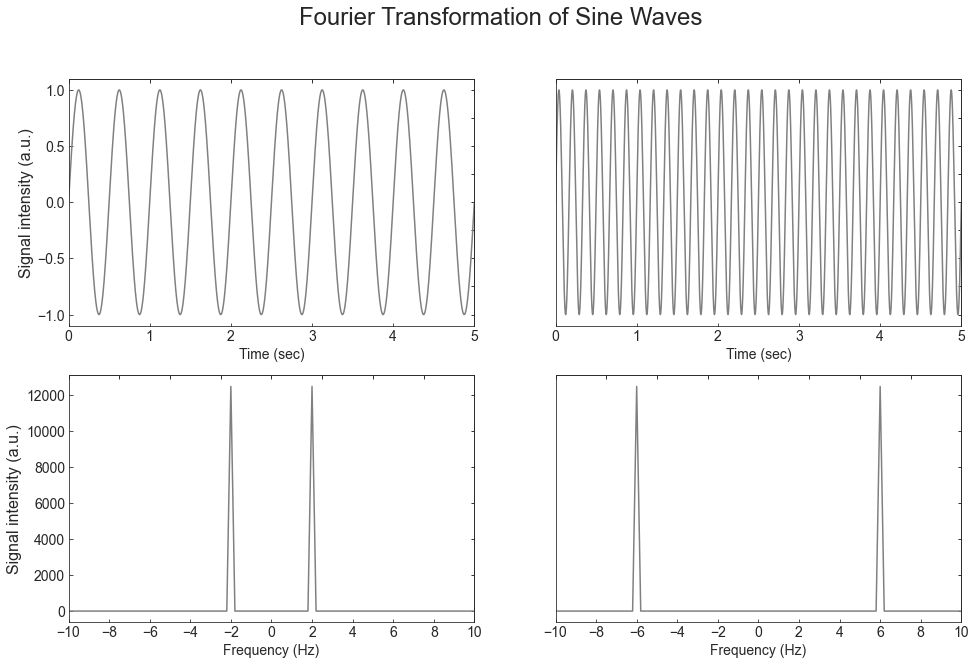

In [152]:
#Define plot parameters

sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 1})


fig = plt.figure(figsize=(16,10))
fig.tight_layout(pad=5.0)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

fig.suptitle('Fourier Transformation of Sine Waves', fontsize=24)

SAMPLE_RATE = 5000  # Hertz
DURATION = 5  # Seconds
FREQUENCY = 2

# Generate a sine wave
x_one, y_one = generate_sine_wave(FREQUENCY, SAMPLE_RATE, DURATION)

#Normalize signal and convert to dataframe
#y_one = np.int16((y_one / y_one.max()) * 32767)
df = pd.DataFrame({'time':x_one, 'signal':y_one})
x_name="time"
y_name="signal"
x_label="Time (sec)"
y_label="Signal intensity (a.u.)"
title="Sine Wave - Time Domain"
x_low_limit=0
x_upper_limit=5
x_axis_major_tick_step=1
sub_plot_signal(ax1, df, x_name, y_name, x_low_limit, x_upper_limit, x_axis_major_tick_step)
ax1.set_xlabel(x_label, fontsize=14)
ax1.set_ylabel(y_label, fontsize=16)


# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

#Perform fft
yf_one = fft(y_one)
yf_abs_one=np.abs(yf_one)
xf = fftfreq(N, 1 / SAMPLE_RATE)

#Convert to dataframe and plot
df = pd.DataFrame({'frequency':xf, 'signal':yf_abs_one})
x_name="frequency"
y_name="signal"
x_label="Frequency (Hz)"
y_label="Signal intensity (a.u.)"
title="Sine Wave - Frequency Domain"
x_low_limit=-10
x_upper_limit=10
x_axis_major_tick_step=2
sub_plot_signal(ax3,df, x_name, y_name, x_low_limit, x_upper_limit, x_axis_major_tick_step)
ax3.set_xlabel(x_label, fontsize=14)
ax3.set_ylabel(y_label, fontsize=16)



SAMPLE_RATE = 5000  # Hertz
DURATION = 5  # Seconds
FREQUENCY = 6

# Generate a sine wave
x_two, y_two = generate_sine_wave(FREQUENCY, SAMPLE_RATE, DURATION)

#Normalize signal and convert to dataframe
#y_two = np.int16((y_two / y_two.max()) * 32767)
df = pd.DataFrame({'time':x_two, 'signal':y_two})
x_name="time"
y_name="signal"
x_label="Time (sec)"
y_label="Signal intensity (a.u.)"
title="Sine Wave - Time Domain"
x_low_limit=0
x_upper_limit=5
x_axis_major_tick_step=1
sub_plot_signal(ax2, df, x_name, y_name, x_low_limit, x_upper_limit, x_axis_major_tick_step)
ax2.get_yaxis().set_visible(False)
ax2.set_xlabel(x_label, fontsize=14)

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

#Perform fft
yf_two = fft(y_two)
yf_abs_two=np.abs(yf_two)
xf = fftfreq(N, 1 / SAMPLE_RATE)

#Convert to dataframe and plot
df = pd.DataFrame({'frequency':xf, 'signal':yf_abs_two})
x_name="frequency"
y_name="signal"
x_label="Frequency (Hz)"
y_label="Signal intensity (a.u.)"
title="Sine Wave - Frequency Domain"
x_low_limit=-10
x_upper_limit=10
x_axis_major_tick_step=2
sub_plot_signal(ax4,df, x_name, y_name, x_low_limit, x_upper_limit, x_axis_major_tick_step)
ax4.get_yaxis().set_visible(False)
ax4.set_xlabel(x_label, fontsize=14)

plt.savefig("figures/Fourier_Transform_Vis_Two_Simple_Waves", bbox_inches='tight')



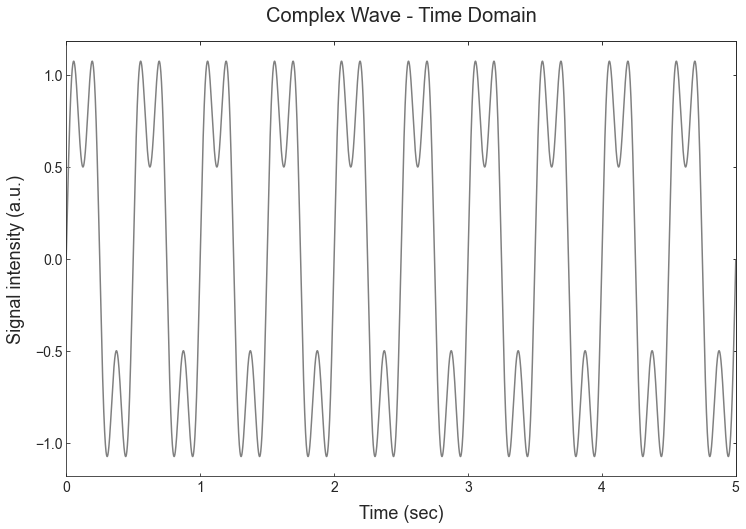

In [153]:
fig = plt.figure(figsize=(12,8))

#Combine two previous waves into one
y_combined=y_one+0.5*y_two

#Normalize signal and convert to dataframe
#y_combined = np.int16((y_combined / y_combined.max()) * 32767)
df = pd.DataFrame({'time':x_two, 'signal':y_combined})
x_name="time"
y_name="signal"
x_label="Time (sec)"
y_label="Signal intensity (a.u.)"
title="Complex Wave - Time Domain"
x_low_limit=0
x_upper_limit=5
x_axis_major_tick_step=1
plot_signal(df, x_name, y_name, x_label, y_label, title, x_low_limit, x_upper_limit, x_axis_major_tick_step)
plt.savefig("figures/Fourier_Transform_Vis_Complex_Wave_Time_Domain", bbox_inches='tight')

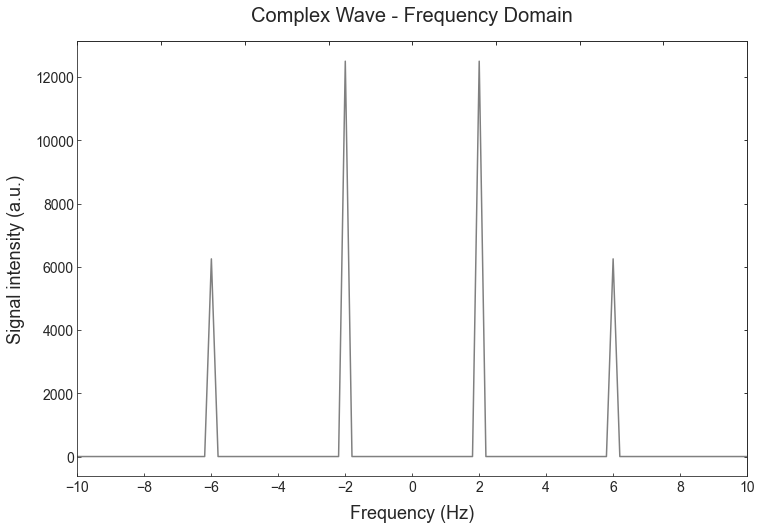

In [154]:
fig = plt.figure(figsize=(12,8))

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

#Perform fft
yf_combined = fft(y_combined)
yf_abs_combined=np.abs(yf_combined)
xf = fftfreq(N, 1 / SAMPLE_RATE)

#Convert to dataframe and plot
df = pd.DataFrame({'frequency':xf, 'signal':yf_abs_combined})
x_name="frequency"
y_name="signal"
x_label="Frequency (Hz)"
y_label="Signal intensity (a.u.)"
title="Complex Wave - Frequency Domain"
x_low_limit=-10
x_upper_limit=10
x_axis_major_tick_step=2
plot_signal(df, x_name, y_name, x_label, y_label, title, x_low_limit, x_upper_limit, x_axis_major_tick_step)
plt.savefig("figures/Fourier_Transform_Vis_Complex_Wave_Freq_Domain", bbox_inches='tight')